Implementar la funcion create_gauss_filter(h, w, k_size, sigma) para crear filtros gaussianos para filtrado espectral. Debe retornar un filtro gaussiano de tamaño HxW en dominio espacial y su transformada de fourier.

1. Graficar ambas representaciones para diferentes tamaños de kernel y sigma. Aplicar el filtro una imagen para validar el funcionamiento en el dominio espectral.
2. Usando el metodo descripto en el paper "Image Sharpness Measure for Blurred Images in Frequency Domain" comparar el resultado de un filtrado por convolucion con el filtrado espectral.
3. Repetir la comparacion usando uno de los metodos descriptos en el apendice del paper "Analysis off focus measure operators in shape-from-focus"

In [2]:
import numpy as np
import pandas as pd
import cv2 as cv
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, FloatSlider, fixed


In [3]:
def create_gauss_filter(h, w, k_size, sigma):
    # Crear el kernel gaussiano
    k_y = cv.getGaussianKernel(k_size, sigma)
    k_x = cv.getGaussianKernel(k_size, sigma)
    k = k_y * k_x.T

    # Agregar padding para casos en que no haya coincidencia entre el tamaño del kernel y de la imagen
    h_pad_1 = int((h - k_size) / 2)
    h_pad_2 = h - k_size - h_pad_1
    w_pad_1 = int((w - k_size) / 2)
    w_pad_2 = w - k_size - w_pad_1

    kernel = np.pad(k, [(h_pad_1, h_pad_2), (w_pad_1, w_pad_2)], mode="constant")

    # Aplicar transformada de Fourier
    kernel_fft = np.fft.fft2(kernel)

    return kernel, kernel_fft

In [4]:
# Funciones auxiliares
def apply_filter(image, kernel):
    filtered_image = cv.filter2D(image, -1, kernel)
    return filtered_image

def shift_log(image):
    shifted_image = np.fft.fftshift(image)
    return 20 * np.log(np.abs(shifted_image))

Text(0.5, 1.0, 'Dominio espectral k=7, sigma=2')

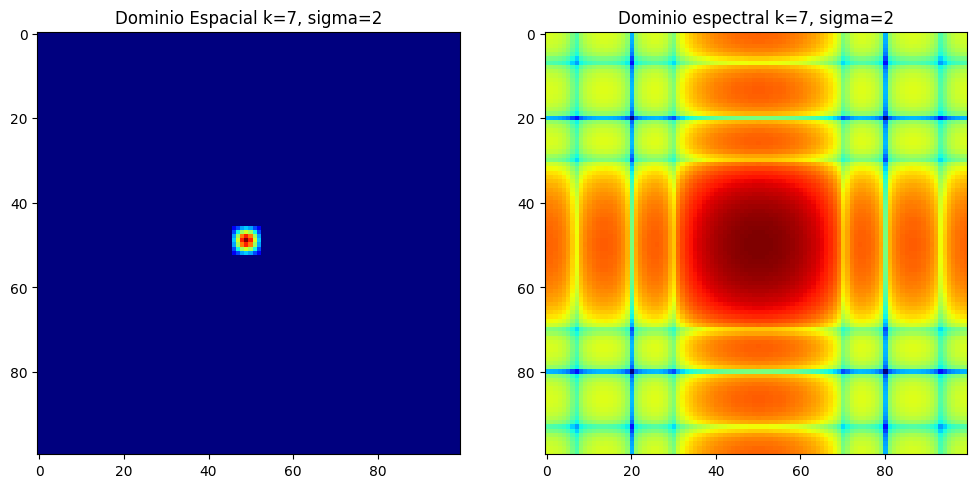

In [5]:
# Parámetros
h, w = 100, 100
k_size = 7
sigma = 2

kernel, kernel_fft = create_gauss_filter(h, w, k_size, sigma)

plt.figure(figsize=(12, 8))
    
plt.subplot(1, 2, 1)
plt.imshow(kernel, cmap='jet')
plt.title(f'Dominio Espacial k={k_size}, sigma={sigma}')

plt.subplot(1, 2, 2)
plt.imshow(shift_log(np.abs(kernel_fft)), cmap='jet')
plt.title(f'Dominio espectral k={k_size}, sigma={sigma}')

In [6]:
# Cargamos una imagen de ejemplo
img_path = "../Material_TPs/TP1/coord_cromaticas"
img = cv.imread(img_path + '/CoordCrom_1.png', cv.IMREAD_GRAYSCALE)

Text(0.5, 1.0, 'Transformada de Fourier')

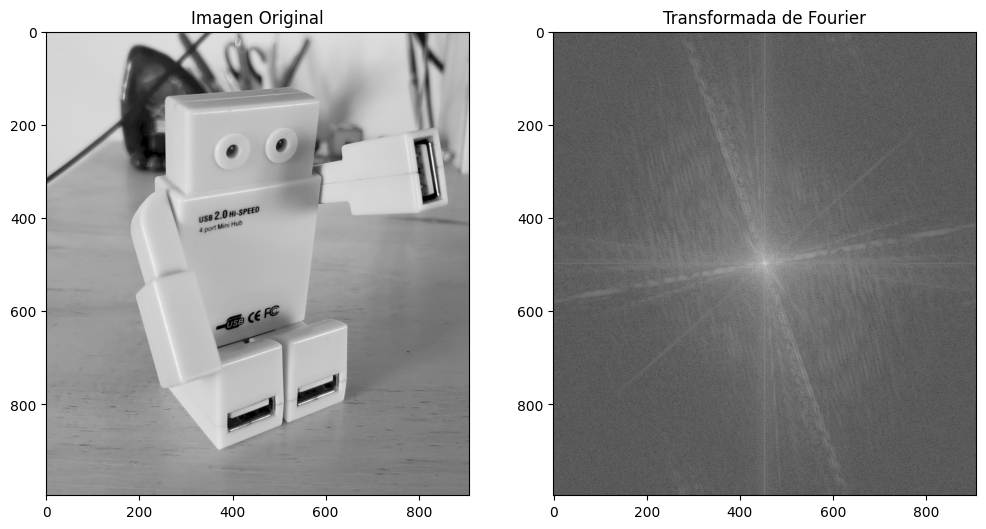

In [7]:
img_tf = np.fft.fft2(img)
fft_image = shift_log(img_tf)

plt.figure(figsize=(12, 8))
    
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')

plt.subplot(1, 2, 2)
plt.imshow(fft_image, cmap='gray')
plt.title('Transformada de Fourier')

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_21112\1239894047.py:8: RuntimeWarning: divide by zero encountered in log
  return 20 * np.log(np.abs(shifted_image))


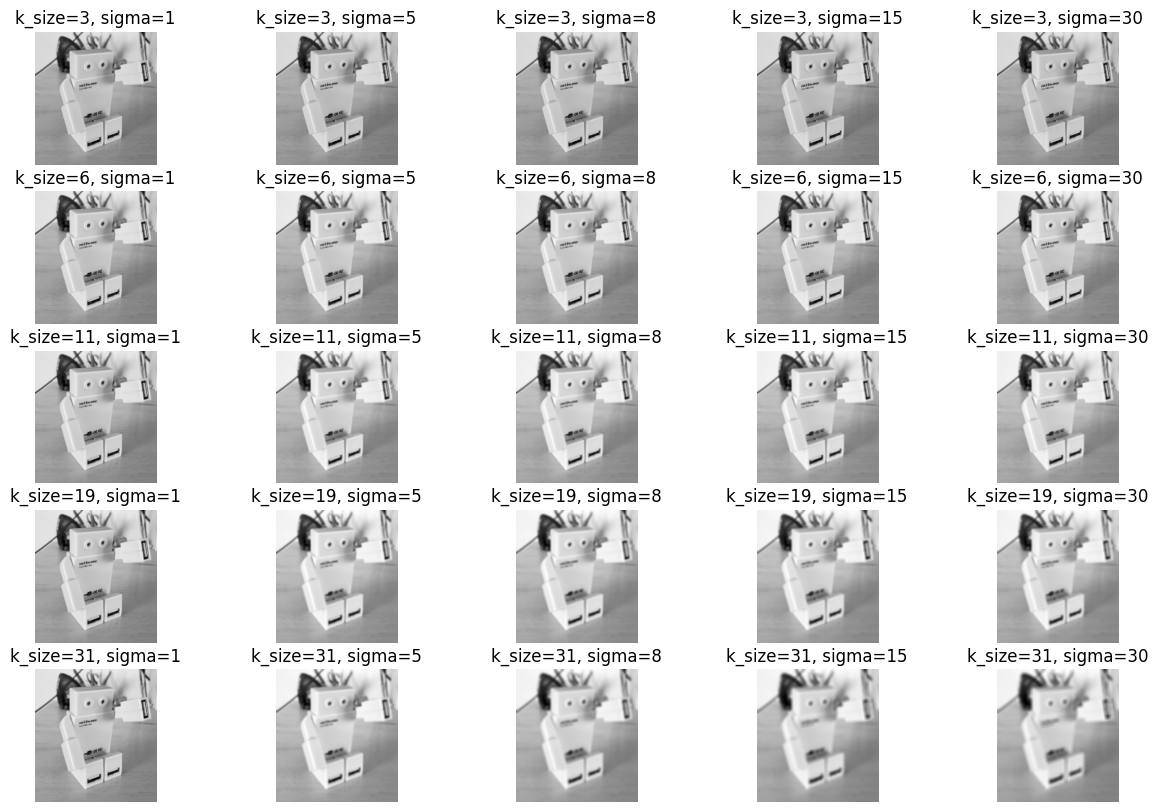

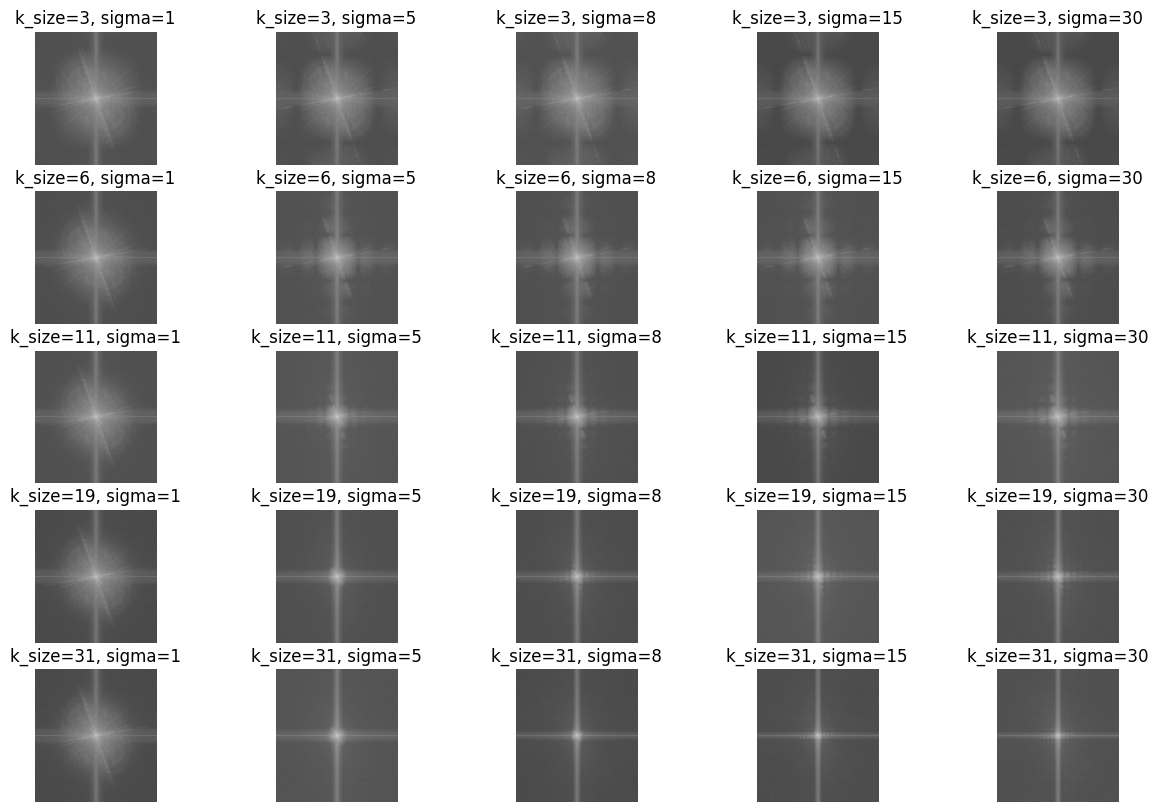

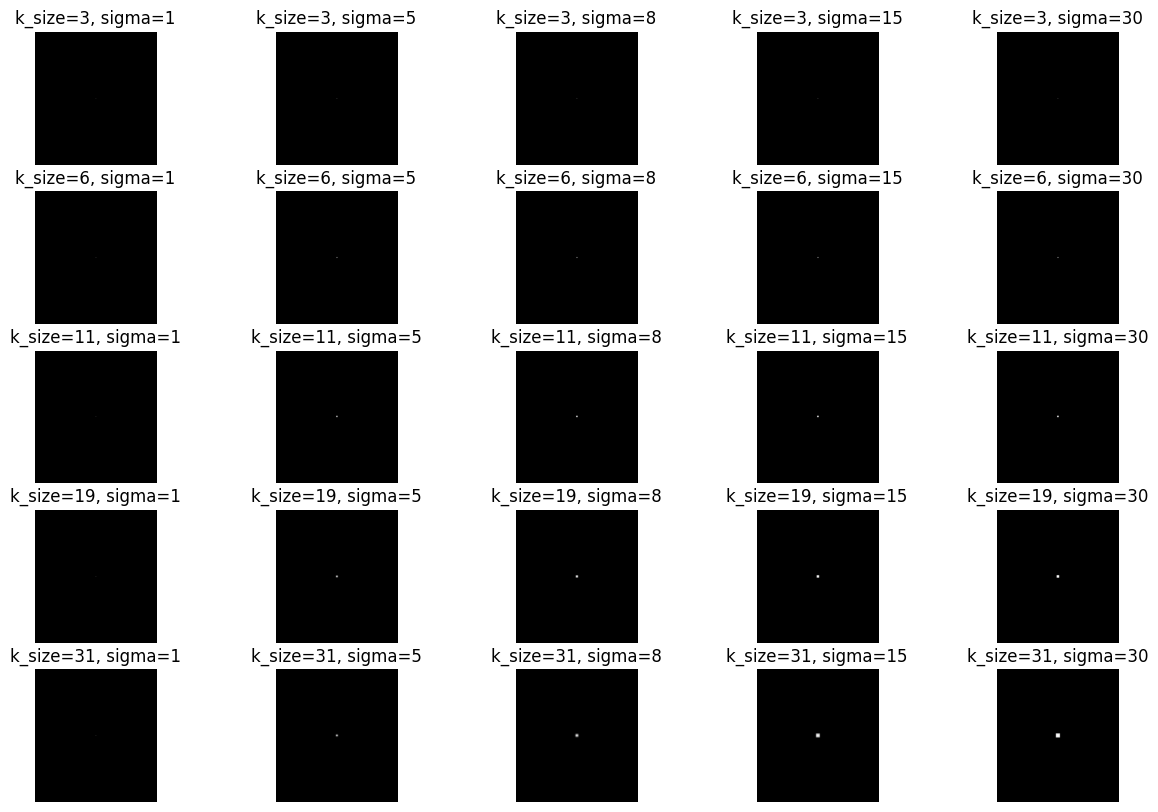

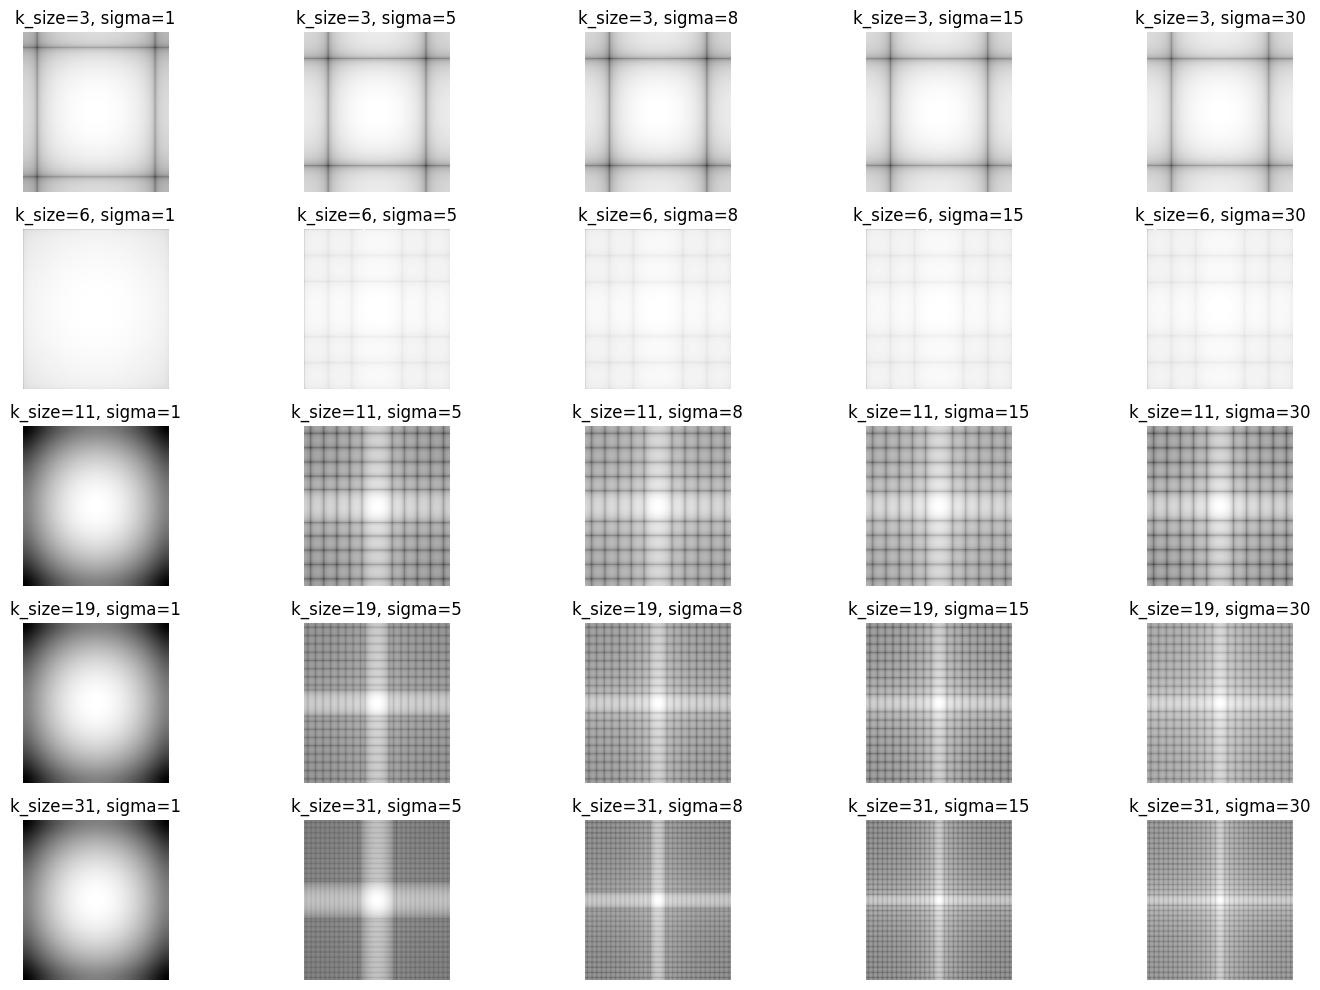

In [10]:
# Parámetros
h, w = img.shape[0], img.shape[1] 
k_sizes = [3, 6, 11, 19, 31] 
sigmas = [1, 5, 8, 15, 30]

fig, axs = plt.subplots(len(k_sizes), len(sigmas), figsize=(15, 10))
fig2, axs2 = plt.subplots(len(k_sizes), len(sigmas), figsize=(15, 10))
fig3, axs3 = plt.subplots(len(k_sizes), len(sigmas), figsize=(15, 10))
fig4, axs4 = plt.subplots(len(k_sizes), len(sigmas), figsize=(15, 10))

# Iterate over all combinations of k_size and sigma
for i, k_size in enumerate(k_sizes):
    for j, sigma in enumerate(sigmas):
        # Create Gaussian filter and its Fourier transform
        kernel, kernel_fft = create_gauss_filter(h, w, k_size, sigma)
        
        # Aplicamos el filtro a la imagen
        filtered_image = apply_filter(img, kernel)
        # Aplicamos transformada de fourier a la imagen
        filtered_image_fft = shift_log(np.fft.fft2(filtered_image))
        # Dominio espacial
        spatial_image = kernel
        # Dominio espectral
        spectral_image = shift_log(kernel_fft)

        # Plot Gaussian filter in spatial domain
        axs[i, j].imshow(filtered_image, cmap='gray')
        axs[i, j].set_title(f'k_size={k_size}, sigma={sigma}')
        axs[i, j].axis('off')

        axs2[i, j].imshow(filtered_image_fft, cmap='gray')
        axs2[i, j].set_title(f'k_size={k_size}, sigma={sigma}')
        axs2[i, j].axis('off')

        axs3[i, j].imshow(spatial_image, cmap='gray')
        axs3[i, j].set_title(f'k_size={k_size}, sigma={sigma}')
        axs3[i, j].axis('off')

        axs4[i, j].imshow(spectral_image, cmap='gray')
        axs4[i, j].set_title(f'k_size={k_size}, sigma={sigma}')
        axs4[i, j].axis('off')

plt.tight_layout()
plt.show()

In [17]:
def update(img, k_size, sigma):
    kernel, kernel_fft = create_gauss_filter(h, w, k_size, sigma)

    # Aplicamos el filtro a la imagen
    filtered_image = apply_filter(img, kernel)
    # Aplicamos transformada de fourier a la imagen
    filtered_image_fft = shift_log(np.fft.fft2(filtered_image))
    # Dominio espacial
    spatial_image = kernel
    # Dominio espectral
    spectral_image = shift_log(kernel_fft)

    plt.figure(figsize=(15, 15))
    
    plt.subplot(1, 5, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Imagen original')
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(1, 5, 2)
    plt.imshow(filtered_image, cmap='gray')
    plt.title('Imagen filtrada')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(1, 5, 3)
    plt.imshow(filtered_image_fft, cmap='gray')
    plt.title('Transformada de Fourier')
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(1, 5, 4)
    plt.imshow(spatial_image, cmap='gray')
    plt.title('Dominio Espacial')
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(1, 5, 5)
    plt.imshow(spectral_image, cmap='gray')
    plt.title('Dominio Espectral')
    plt.xticks([])
    plt.yticks([])

    plt.show()

In [22]:
# Imagen interactiva con dos sliders para modificar kernel size y sigma
interact(update, img = fixed(img),
         k_size=IntSlider(min=1, max=50, step=1, value=17, description='Kernel Size'), 
         sigma=FloatSlider(min=0.1, max=40, step=0.1, value=5, description='Sigma')
         )

interactive(children=(IntSlider(value=17, description='Kernel Size', max=50, min=1), FloatSlider(value=5.0, de…

<function __main__.update(img, k_size, sigma)>

Usando el metodo descripto en el paper "Image Sharpness Measure for Blurred Images in Frequency Domain" comparar el resultado de un filtrado por convolucion con el filtrado espectral.

In [24]:
# Input: Image I of size MxN
I = img.copy
# Output: Image Quality measure (FM) where FM stands for Frequency Domain Image Blur Measure
def image_quality_measure(image):
    # Step 1: Compute F which is the Fourier Transform representation of image I
    F = np.fft.fft2(image)
    # Step 2: Find Fc which is obtained by shifting the origin of F to the centre
    Fc = np.fft.fftshift(F)
    # Step 3: Calculate AF = abs (Fc) where AF is the absolute value of the centered Fourier transform of Image I
    AF = np.abs(Fc)
    # Step 4: Calculate M = max (AF) where M is the maximum value of the frequency component in F
    M = np.max(AF)
    # Step 5: Calculate TH = the total number of pixels in F whose pixel value > thres, where thres = M/1000
    thres = M/1000
    TH = np.sum(F>thres)
    # Step 6: Calculate Image Quality measure (FM) from equation (1)
    FM = TH / (image.shape[0] * image.shape[1])
    return FM

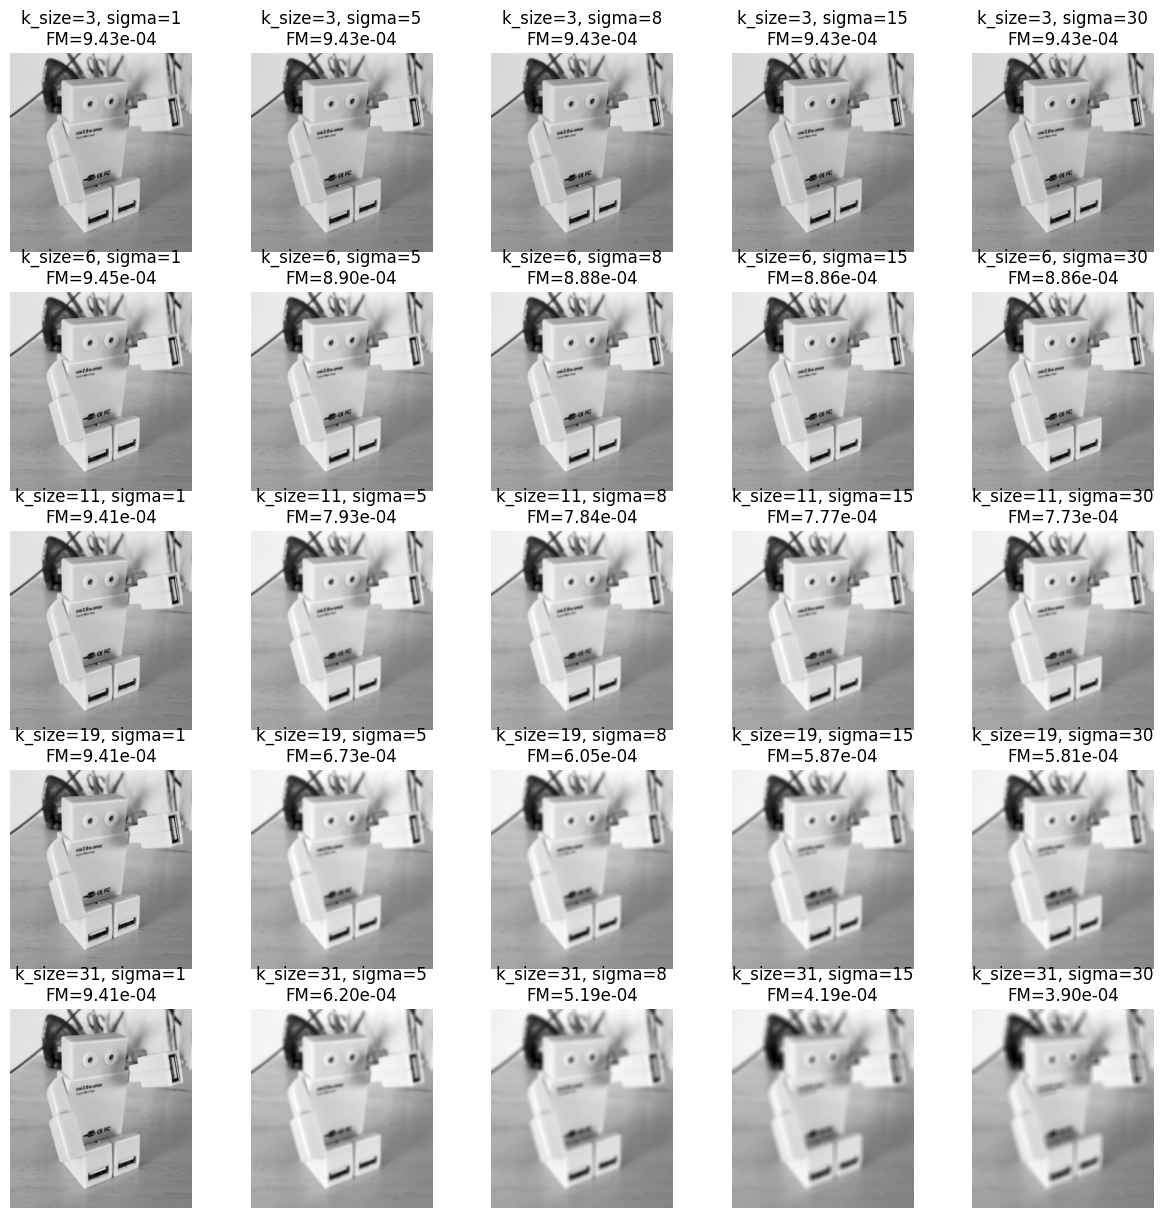

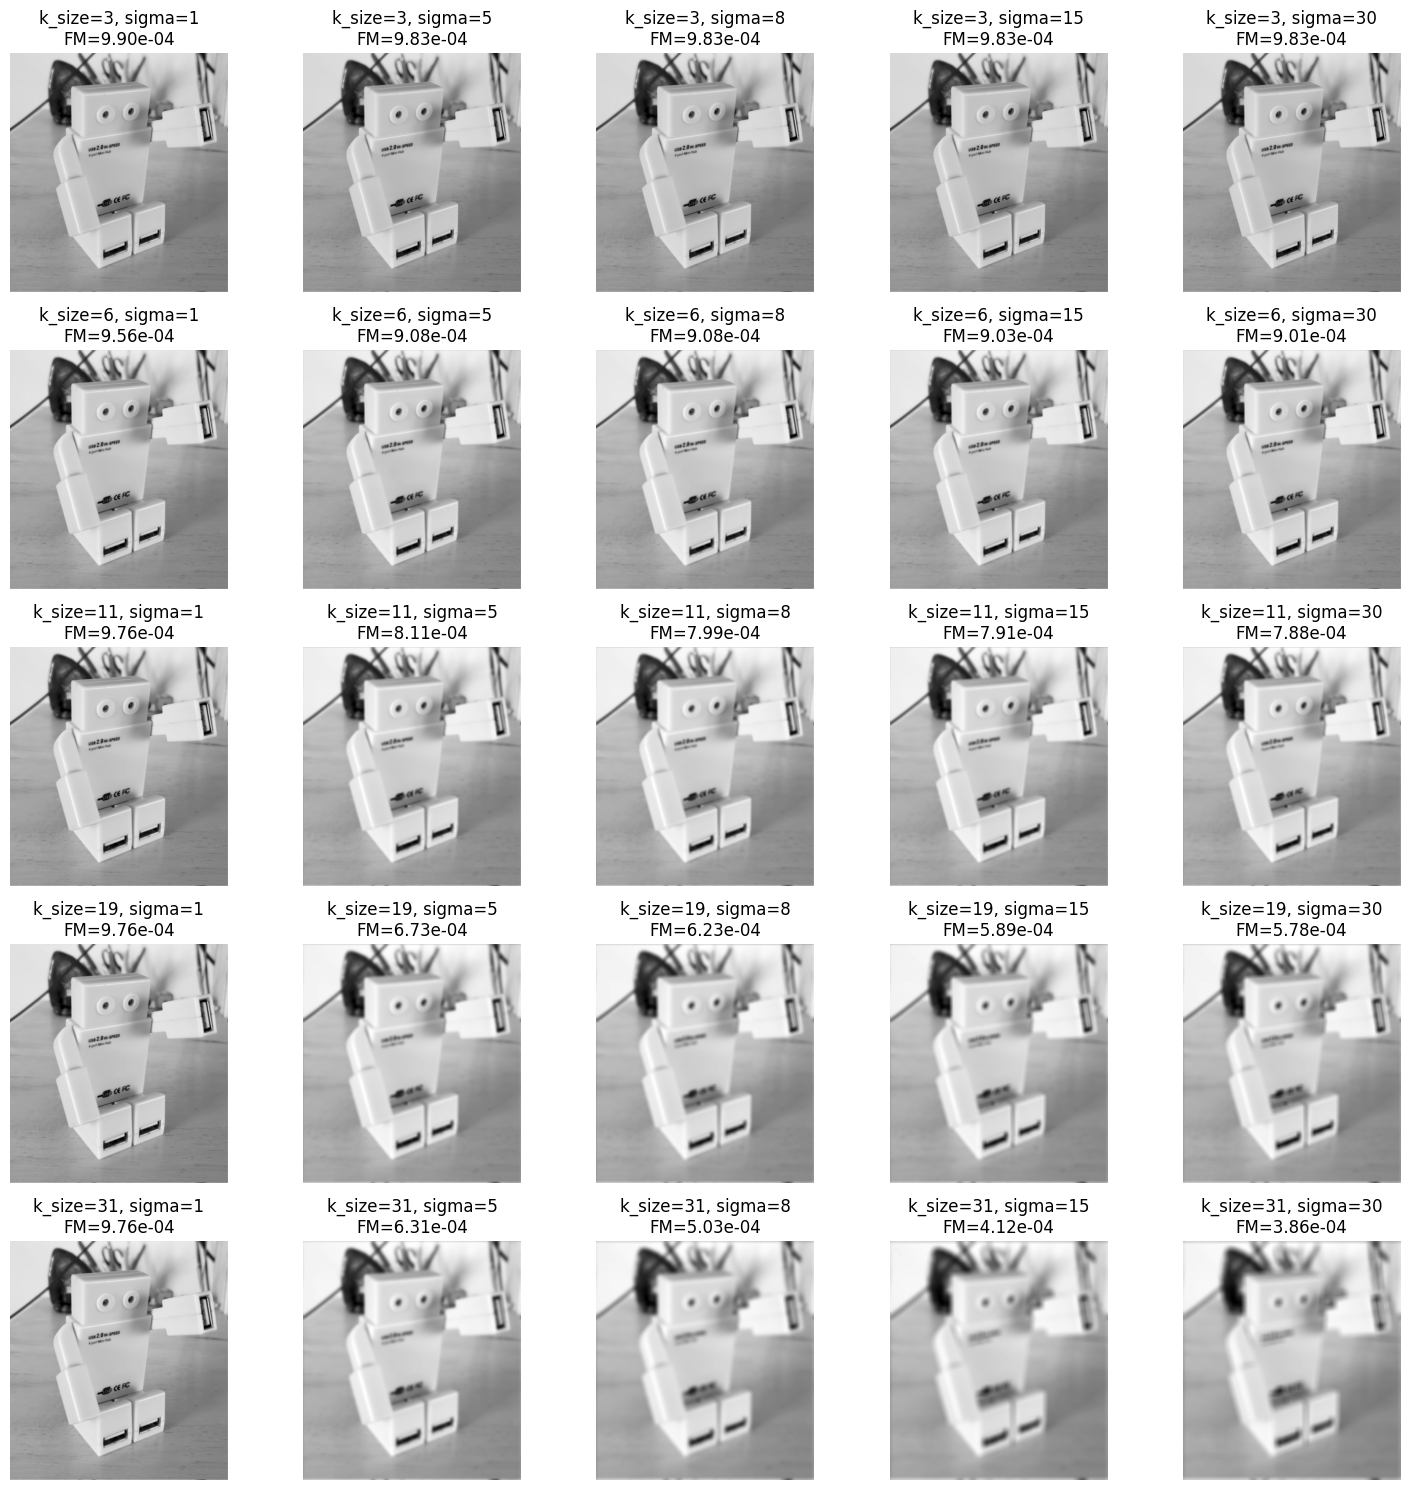

In [32]:
# Parámetros
h, w = img.shape[0], img.shape[1] 
k_sizes = [3, 6, 11, 19, 31] 
sigmas = [1, 5, 8, 15, 30]

fig1, axs1 = plt.subplots(len(k_sizes), len(sigmas), figsize=(15, 15))
fig2, axs2 = plt.subplots(len(k_sizes), len(sigmas), figsize=(15, 15))

# Iterar sobre los valores de sigma y k_size
for i, k_size in enumerate(k_sizes):
    for j, sigma in enumerate(sigmas):
        kernel, _ = create_gauss_filter(h, w, k_size, sigma)
        
        filtered_image = apply_filter(img, kernel)

        FM = image_quality_measure(filtered_image)

        axs1[i, j].imshow(filtered_image, cmap='gray')
        axs1[i, j].set_title(f'k_size={k_size}, sigma={sigma}\nFM={FM:.2e}')
        axs1[i, j].axis('off')

# Iterar sobre los valores de sigma y k_size
for i, k_size in enumerate(k_sizes):
    for j, sigma in enumerate(sigmas):
        _, kernel_fft = create_gauss_filter(h, w, k_size, sigma)
        
        filtered_image = np.fft.fft2(img) * kernel_fft
        filtered_image = np.fft.ifftshift(np.real(np.fft.ifft2(filtered_image)))

        FM = image_quality_measure(filtered_image)

        axs2[i, j].imshow(filtered_image, cmap='gray')
        axs2[i, j].set_title(f'k_size={k_size}, sigma={sigma}\nFM={FM:.2e}')
        axs2[i, j].axis('off')

plt.tight_layout()
plt.show()

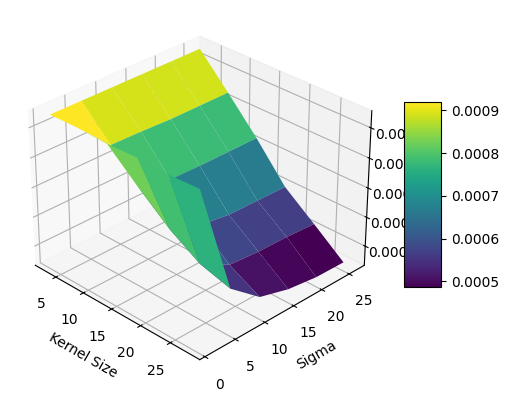

In [43]:
k_sizes = np.arange(3, 31, 5)
sigmas = np.arange(1, 30, 5)
h, w = img.shape[0], img.shape[1] 

image_quality_spatial = np.zeros(shape=[len(k_sizes), len(sigmas)])
image_quality_spectral = np.zeros(shape=[len(k_sizes), len(sigmas)])

for i, k_size in enumerate(k_sizes):
    for j, sigma in enumerate(sigmas):
        kernel, kernel_fft = create_gauss_filter(h, w, k_size, sigma)
        
        filtered_image_spatial = apply_filter(img, kernel)        
        filtered_image_spectral = np.fft.fft2(img) * kernel_fft
        filtered_image_spectral = np.fft.ifftshift(np.real(np.fft.ifft2(filtered_image_spectral)))

        image_quality_spatial[i,j] = image_quality_measure(filtered_image_spatial)
        image_quality_spectral[i,j] = image_quality_measure(filtered_image_spectral)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
kernel_sizes_grid, sigmas_grid = np.meshgrid(k_sizes, sigmas)
surf = ax.plot_surface(kernel_sizes_grid.T, sigmas_grid.T, image_quality_spatial, cmap='viridis')

ax.set_xlabel('Kernel Size')
ax.set_ylabel('Sigma')
ax.set_zlabel('Image Quality Spatial')
ax.view_init(elev=30, azim=-45)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

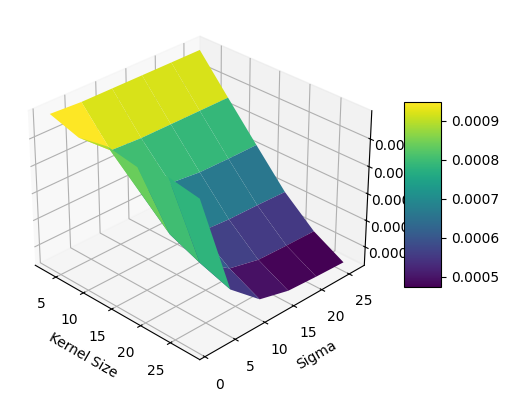

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
kernel_sizes_grid, sigmas_grid = np.meshgrid(k_sizes, sigmas)
surf = ax.plot_surface(kernel_sizes_grid.T, sigmas_grid.T, image_quality_spectral, cmap='viridis')

ax.set_xlabel('Kernel Size')
ax.set_ylabel('Sigma')
ax.set_zlabel('Image Quality Spectral')
ax.view_init(elev=30, azim=-45)
fig2.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

Tanto por dominio espectral como espacial el metodo de calcular calidad de la imagen da bastante parecido.

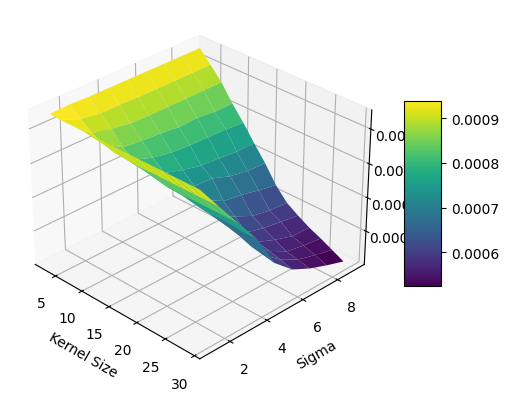

In [223]:
k_sizes = np.arange(3, 31, 2)
sigmas = np.arange(1, 10, 1)
h, w = img.shape[0], img.shape[1] 

image_quality = np.zeros(shape=[len(k_sizes), len(sigmas)])

for i, k_size in enumerate(k_sizes):
    for j, sigma in enumerate(sigmas):
        kernel, _ = create_gauss_filter(h, w, k_size, sigma)
        
        filtered_image = apply_filter(img, kernel)

        image_quality[i,j] = image_quality_measure(filtered_image)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
kernel_sizes_grid, sigmas_grid = np.meshgrid(k_sizes, sigmas)
surf = ax.plot_surface(kernel_sizes_grid.T, sigmas_grid.T, image_quality, cmap='viridis')

ax.set_xlabel('Kernel Size')
ax.set_ylabel('Sigma')
ax.set_zlabel('Image Quality')
ax.view_init(elev=30, azim=-45)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

Repetir la comparacion usando uno de los metodos descriptos en el apendice del paper "Analysis off focus measure operators in shape-from-focus"

Utilizaremos el A.8 Spatial frequency measure (MIS8)

$$\phi_{x,y}=\sqrt{\sum_{(i,j)\in\Omega(x,y)}^{}I_x(i,j)^2+\sum_{(i,j)\in\Omega(x,y)}^{}I_y(i,j)^2}$$

Where:
- $I_x(i,j)$ represents the gradient in the X direction at pixel (I, j).
- $I_y(i,j)$ represents the gradient in the Y direction at pixel (I, j).


In [46]:
def spatial_frequency_measure(image, k_size = 3):

    # Paso 1: calcular el gradiente en direccion X y Y
    gradiente_x = cv.Sobel(image, cv.CV_64F, 1, 0, ksize=k_size)
    gradiente_y = cv.Sobel(image, cv.CV_64F, 0, 1, ksize=k_size)

    # Paso 2: elevar al cuadrado los gradientes
    gradiente_x_squared = gradiente_x ** 2
    gradiente_y_squared = gradiente_y ** 2

    # Paso 3: hacer la sumatoria y raiz cuadrada
    sf_measure = np.sqrt(np.sum(gradiente_x_squared) + np.sum(gradiente_y_squared))

    return sf_measure

sf_measure = spatial_frequency_measure(img, 3)
print(f"Spatial Frequency Measure: {sf_measure:.2e}")

Spatial Frequency Measure: 4.94e+04


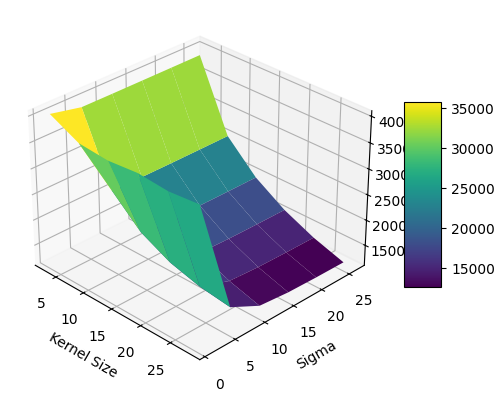

In [47]:
k_sizes = np.arange(3, 31, 5)
sigmas = np.arange(1, 30, 5)
h, w = img.shape[0], img.shape[1] 

image_quality_spatial = np.zeros(shape=[len(k_sizes), len(sigmas)])
image_quality_spectral = np.zeros(shape=[len(k_sizes), len(sigmas)])

for i, k_size in enumerate(k_sizes):
    for j, sigma in enumerate(sigmas):
        kernel, kernel_fft = create_gauss_filter(h, w, k_size, sigma)
        
        filtered_image_spatial = apply_filter(img, kernel)        
        filtered_image_spectral = np.fft.fft2(img) * kernel_fft
        filtered_image_spectral = np.fft.ifftshift(np.real(np.fft.ifft2(filtered_image_spectral)))

        image_quality_spatial[i,j] = spatial_frequency_measure(filtered_image_spatial, 3)
        image_quality_spectral[i,j] = spatial_frequency_measure(filtered_image_spectral, 3)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
kernel_sizes_grid, sigmas_grid = np.meshgrid(k_sizes, sigmas)
surf = ax.plot_surface(kernel_sizes_grid.T, sigmas_grid.T, image_quality_spatial, cmap='viridis')

ax.set_xlabel('Kernel Size')
ax.set_ylabel('Sigma')
ax.set_zlabel('Image Quality Spatial')
ax.view_init(elev=30, azim=-45)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

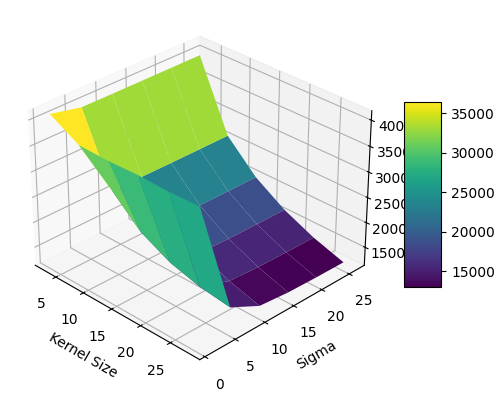

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
kernel_sizes_grid, sigmas_grid = np.meshgrid(k_sizes, sigmas)
surf = ax.plot_surface(kernel_sizes_grid.T, sigmas_grid.T, image_quality_spectral, cmap='viridis')

ax.set_xlabel('Kernel Size')
ax.set_ylabel('Sigma')
ax.set_zlabel('Image Quality Spectral')
ax.view_init(elev=30, azim=-45)
fig2.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

A partir de los graficos 3D, vemos que ambos metodos tienen un comportamiento similar, es decir, la la calidad de la imagen baja cuando aumenta el tamaño del kernel y cuando aumenta el tamaño de sigma.
Para comparar ambos metodos uno con el otro, debemos utilizar ejes distintos, ya que el orden de magnitud de la variable de calidad de imagen es diferente.